In [3]:
#Llamar al dataloader
%run DataLoader.ipynb

In [4]:
#Verificamos que el dataset no tenga ningúna fila que contenga la cadena de texto 'NaN'
#ya que vamos a tener que reemplazar los valores nulos por ese string para que el análisis sea bueno
len(dataset[(dataset.keyword.str.contains('NaN')) |\
        (dataset.location.str.contains('NaN')) |\
        (dataset.text.str.contains('NaN'))])

#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

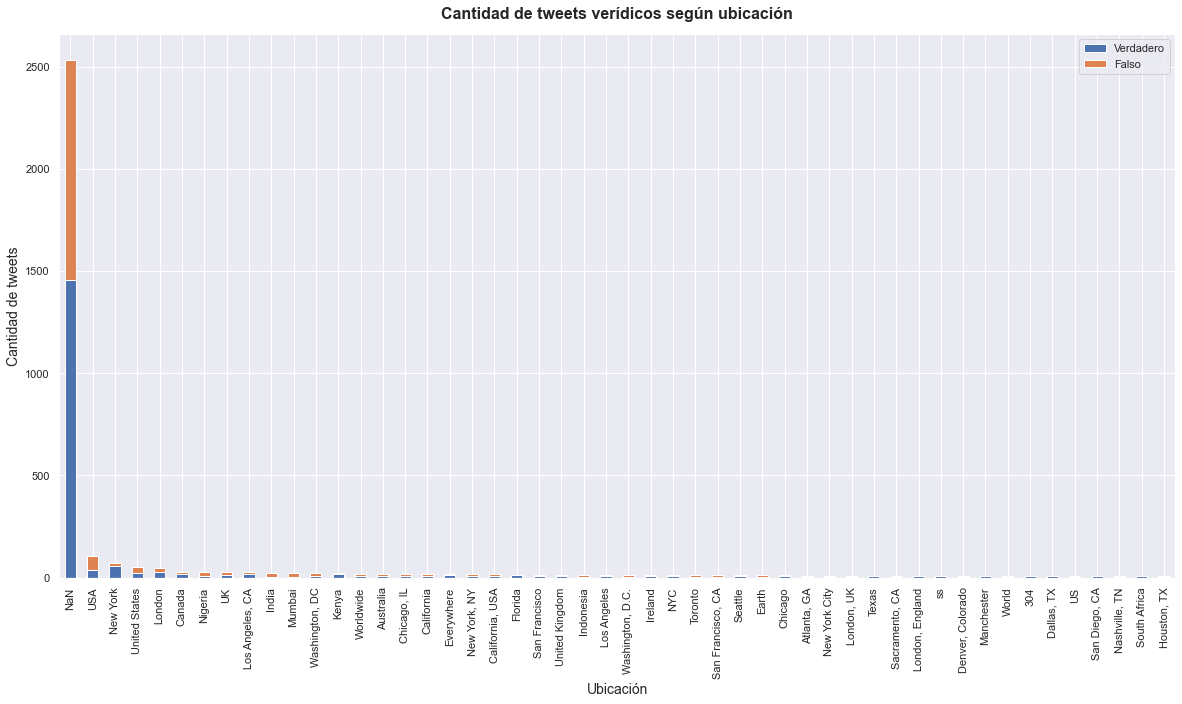

In [5]:
# Tweets y su veracidad por ubicación
grupo = grupo.groupby(['location', 'target']).agg({'target': 'count'})
grupo.columns = ['Cantidad']
grupo = grupo.reset_index()
grupo = grupo.pivot_table(index = 'location', columns = 'target', values = 'Cantidad', fill_value = 0)
grupo.columns = ['Verdadero', 'Falso']
grupo['Total'] = grupo.Verdadero + grupo.Falso
grupo = grupo.sort_values(by = 'Total', ascending=False)
grupo = grupo.drop(columns = ['Total']).head(50)

sns.set()
fig, ax = plt.subplots()
grupo.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Ubicación",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación',fontsize=16,fontweight='bold', pad = 15)
plt.show()

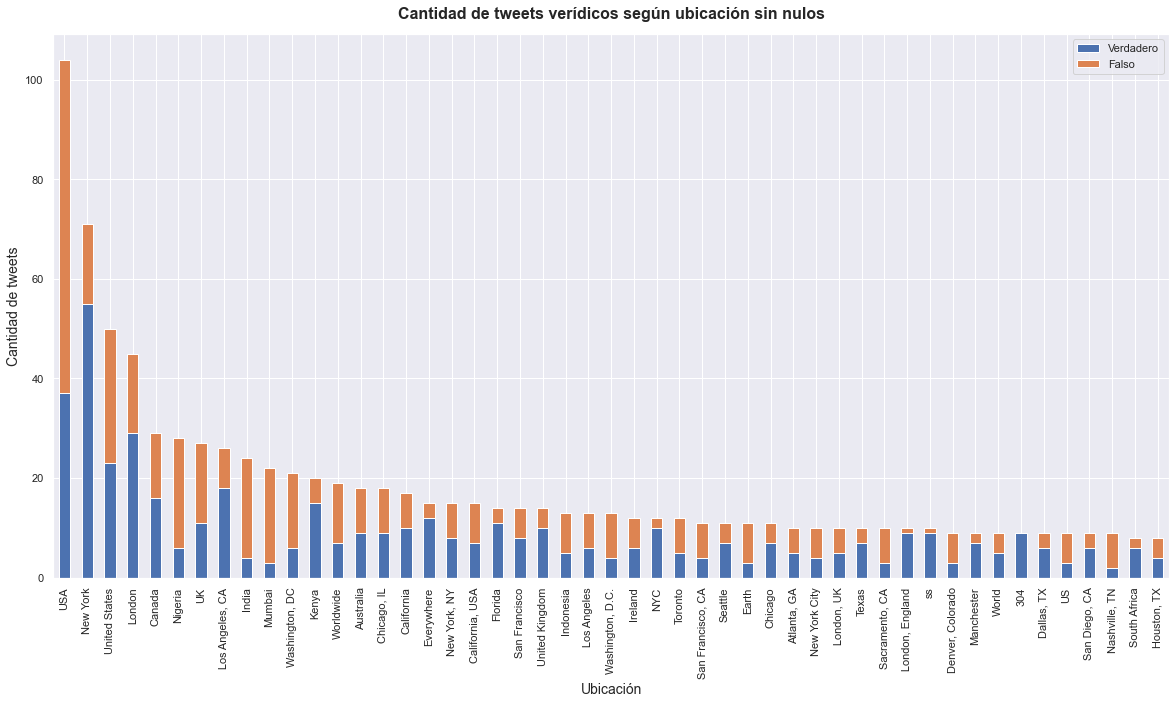

In [7]:
#Debido a la enorme cantiad de valores nulos merece un gráfico sin este
grupo = grupo[grupo.index != 'NaN']
sns.set()
fig, ax = plt.subplots()
grupo.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Ubicación",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación sin nulos',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()